In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


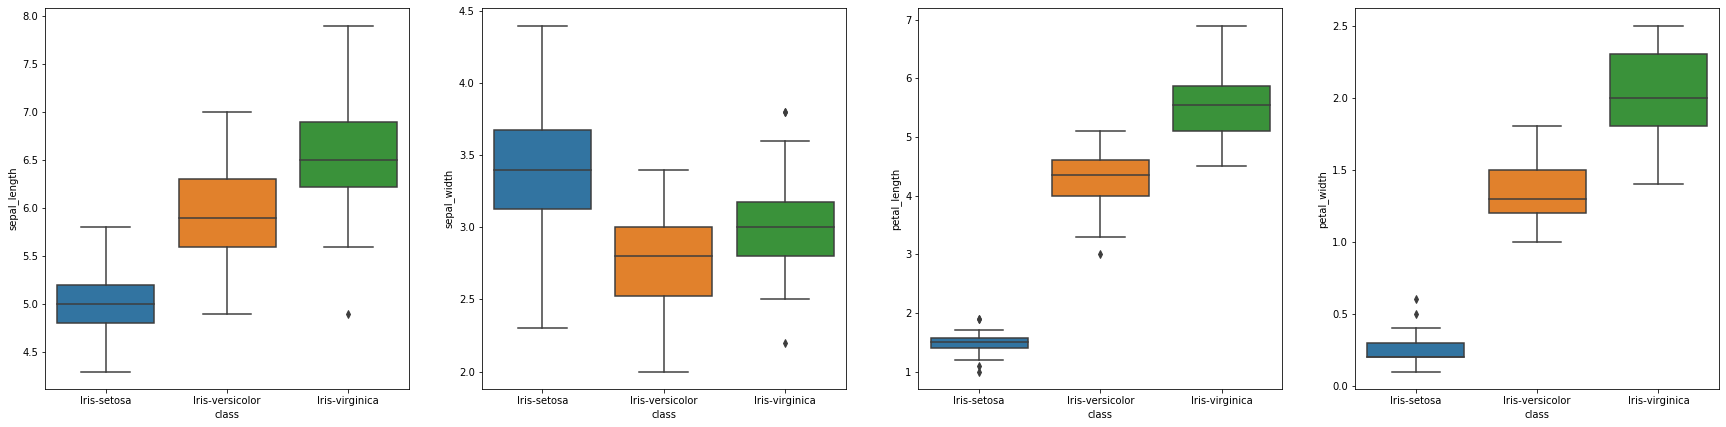

In [4]:
plt.figure(figsize=(30, 7))
plt.subplot(1, 4, 1)
sns.boxplot(data=data, x='class', y='sepal_length')
plt.subplot(1, 4, 2)
sns.boxplot(data=data, x='class', y='sepal_width')
plt.subplot(1, 4, 3)
sns.boxplot(data=data, x='class', y='petal_length')
plt.subplot(1, 4, 4)
sns.boxplot(data=data, x='class', y='petal_width')
plt.show()

Both *petal_length* and *petal_width* defines precisely the *Iris-setosa* class.

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier

clas = DecisionTreeClassifier()
clas.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
y_pred = clas.predict(X_test)

In [8]:
comp_data = {
    'test': y_test,
    'pred': y_pred
}

df_compare = pd.DataFrame(data=comp_data)
df_compare['pred_correct'] = np.where(df_compare['test'] == df_compare['pred'], True, False)
print('Accuracy: %.2f%%' % ((df_compare[df_compare['pred_correct'] == True].shape[0] / df_compare.shape[0]) * 100))

Accuracy: 100.00%
